In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
path ="C:/Users/Anindita/Desktop/INNOVATIVE PROJECT-4TH/DATASET/smallchars/"
files = os.listdir(path)[:26]
print(files)
classes={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12}

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'J', 'K', 'L', 'm']


In [3]:
import cv2
X=[]
Y=[]

for cl in classes:
    pth= path+cl
    for img_name in os.listdir(pth):
      img= cv2.imread(pth+"/"+img_name,0)
      X.append(img)
      Y.append(classes[cl])
      print("dataset created successfully!")

dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset cr

In [4]:
pd.Series(Y).value_counts()

0     5000
1     5000
3     5000
4     5000
5     5000
6     5000
7     5000
8     5000
9     5000
10    5000
11    5000
12    5000
2     4000
dtype: int64

In [5]:
X[0].shape

(128, 128)

In [6]:
print(type(X))
X=np.array(X)
Y=np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


3


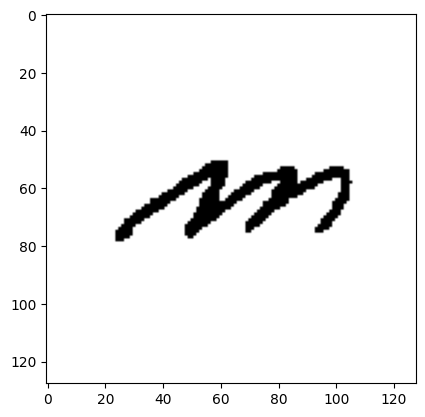

In [7]:
plt.imshow(X[63999],cmap="gray")           
print(Y[15600])    
# FOR X  
# Y SHOWS CLASS FOR FILES                  

In [8]:
X_new= X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(64000, 16384)
(64000,)


In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y,test_size=.20, random_state=10)

In [10]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(51200, 16384) (51200,)
(12800, 16384) (12800,)


In [11]:
print(xtrain.max())
print(xtest.max())
x_train=xtrain/255
x_test=xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


In [12]:
from sklearn.decomposition import IncrementalPCA

In [13]:
print (x_train.shape, x_test.shape)
#ipca=IncrementalPCA(1)
ipca = IncrementalPCA(n_components=2, batch_size=3)
xtrain= ipca.fit_transform(x_train)
xtest=ipca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(ipca.n_components)
print(ipca.n_features_)

(51200, 16384) (12800, 16384)


MemoryError: Unable to allocate 6.25 GiB for an array with shape (51200, 16384) and data type float64

In [ ]:
ytest[:10]

In [ ]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

In [ ]:
tr_pred = log.predict(xtrain)
ts_pred=log.predict(xtest)

In [ ]:
print("Training Score", accuracy_score(ytrain,tr_pred))
print("Testing Score", accuracy_score(ytest,ts_pred))

In [ ]:
plt.imshow(x_test[22343].reshape(32,32), cmap='gray')
print(ytest[22343])                                      #MAX LIMIT FOR X AND Y 77952

In [ ]:
decode ={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.imshow(x_test[i].reshape(32,32),cmap='gray')
  plt.title(decode[ts_pred[i]])
  plt.axis('off')

In [ ]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Actual':ytest,'Prediction':ts_pred})
d[d['Actual']!=d['Prediction']]

In [ ]:
img= cv2.resize(cv2.imread('C:/Users/Anindita/Desktop/A_test/A_30015.png',0),(32,32))
plt.imshow(img,cmap='gray')

In [ ]:
img=pca.transform(img.reshape(1,-1)/255)

In [ ]:
decode[log.predict(img)[0]]